In [1]:
from matplotlib import pyplot as plt
from matplotlib import colors, cm
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from skimage.io import imread
import random as rand
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import math, random

In [2]:
def read_tuple_list(x):
    x_strip = x.strip('()').strip('[]')
    if len(x_strip.split(', ')) == 1:
        return np.array(x_strip.split(), dtype=float)
    else:
        return np.array(x_strip.split(', '), dtype=float)

In [3]:
#Lets import an arcos set, wave data, and the corresponding tracking data...
#base_path = Path('/media/echo/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Data Sets/2023_01_24_main-set')
base_path = Path('/Volumes/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Data Sets/2023_01_24_main-set')
images_folder = base_path / 'images'
analysis_output_destination = base_path / 'wavefit_outputs'

image_num = str(38) #57 used, 88 used, 45, 46 used for supp

wave_df = pd.read_csv(analysis_output_destination / '{}_wave_df.csv'.format(image_num), converters={"wave_centroid": read_tuple_list})
arcos_df = pd.read_csv(analysis_output_destination / '{}_ARCOS_df.csv'.format(image_num))
tracking_df = pd.read_csv(analysis_output_destination / '{}_tracking_binned_df.csv'.format(image_num))

um_per_px = 2.2

In [4]:
#So track IDs and corrresponding tracks are found in tracking df, 
#The corresponding points that made the circle are in arcos df, 
#the waves to analze are in waves df, need to go from 
#WaveDF --> arcosDF --> trackingDF 
#Get centroid and radius over time from waveDF, 
#Get trackID inside wavefront from arcosDF, 
#Get track from tracking, then calc radial movement as enter wavefront? 

In [4]:
raw_tif = imread(images_folder / '{}.tif'.format(image_num))


<AxesSubplot:xlabel='timepoint', ylabel='circle_radius'>

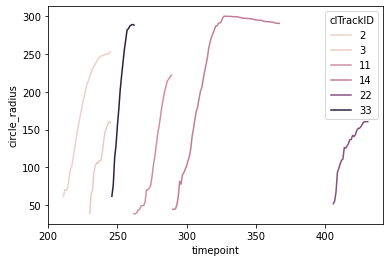

In [5]:
sns.lineplot(data=wave_df[wave_df['trackable']==True], x='timepoint', y='circle_radius', hue='clTrackID')

In [7]:
wave_df.clTrackID.unique()

array([ 2,  3, 11, 14, 22, 33, 20, 21, 25, 32])

In [6]:
#Lets select the example wave: (#image number: wave number)
ex_wave_num = 33 #57:6, 88:5, 45:19
ex_wave_DF = wave_df[wave_df['clTrackID']==ex_wave_num]
ex_arcos_DF = arcos_df[arcos_df['clTrackID']==ex_wave_num]
start_time = ex_wave_DF.timepoint.min()
pre_wave_time = start_time - 12 #one min prior to wave
end_time = ex_wave_DF.timepoint.max()
post_wave_time = end_time + 2 #four min after wave
ex_wave_DF['real_time'] = ex_wave_DF['rel_time']*5.0

/var/folders/g_/8zgtwjx50cg4__mg9df381000000gn/T/ipykernel_46012/664323150.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_wave_DF['real_time'] = ex_wave_DF['rel_time']*5.0


In [7]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})

save_dir = '/Volumes/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Supplement 2/early-v-late/'


In [8]:
split_time = ex_wave_DF.groupby('split').get_group(0).real_time.max()



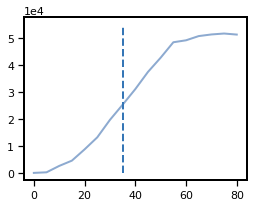

In [23]:
plt.figure(figsize=(4,3))
sns.lineplot(data=ex_wave_DF, x='real_time', y='r_squared', color = '#8DAAD0')
plt.vlines(split_time, ymin=0,ymax=55000, colors='#3576B6', linestyle='dashed')
plt.xlabel('')
plt.ylabel('')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.ylim(-500,55000)
#plt.xlim(0,80)
plt.savefig(save_dir+ image_num + '_wave-{}_R2.png'.format(str(ex_wave_num)), dpi=300, bbox_inches='tight')

In [10]:
raw_mean_calcium = [np.mean(frame) for frame in raw_tif[:,0,:,:]]
wave_before = min(ex_wave_DF.timepoint.values) - 6
wave_after = max(ex_wave_DF.timepoint.values) + 6
wave_duration = (max(ex_wave_DF.timepoint.values) - min(ex_wave_DF.timepoint.values))*5
real_time_shifted = np.array(range(-6, wave_after-min(ex_wave_DF.timepoint.values), 1))*5.0


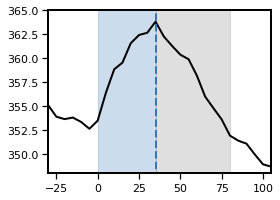

In [19]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(real_time_shifted,raw_mean_calcium[wave_before:wave_after], color='k')
ax.vlines(split_time, ymin=340,ymax=365, colors='#3576B6', linestyle='dashed')
ax.fill_between((0,split_time), 340, 370, alpha=0.25, color='#3576B6')
ax.fill_between((split_time,wave_duration), 340, 370, alpha=0.25, color='grey')
plt.ylim(348,365)
plt.xlim(-30,105)
plt.savefig(save_dir+ image_num + '_wave-{}_avg-calcium.png'.format(str(ex_wave_num)), dpi=300, bbox_inches='tight')